In [1]:
# Initial imports
import numpy as np
import pandas as pd
from stockstats import StockDataFrame as sdf
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path
import lib_copy
%matplotlib inline

In [2]:
load_dotenv()

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8


True

In [3]:


df = lib_copy.fetch_ohlcv("JPM")


In [4]:
def adding_boll_kelt_ewma_dataframe(dataframe):
    lib_copy.bollinger_band_generator(dataframe)
    lib_copy.keltner_channel(dataframe)
    lib_copy.ewma(dataframe)

    return dataframe

In [5]:
everything = adding_boll_kelt_ewma_dataframe(df)

In [6]:
# Looking for missing values
everything.isnull().sum().sum()

61

In [7]:
# Filling missing values with the previous ones
everything = df.dropna()
everything.head()

,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,close_-1_s,tr,tr_14_smma,atr,kcmid,kcup,kclo,EMA9,EMA21
2020-01-03 12:30:00-05:00,138.95,139.085,138.930,139.02,3480,139.32775,1.201613,141.730977,136.924523,138.97,0.155,0.388735,0.388735,139.32775,139.716485,138.939015,138.848047,139.241209
2020-01-03 12:45:00-05:00,139.06,139.170,138.985,139.17,5531,139.24975,1.155548,141.560846,136.938654,139.02,0.185,0.369905,0.369905,139.24975,139.619655,138.879845,138.912438,139.234735
2020-01-03 13:00:00-05:00,139.14,139.220,139.070,139.07,3954,139.15975,1.091007,141.341764,136.977736,139.17,0.150,0.349999,0.349999,139.15975,139.509749,138.809751,138.943950,139.219759
2020-01-03 13:15:00-05:00,139.05,139.085,138.980,139.08,3774,139.06475,1.003367,141.071485,137.058015,139.07,0.105,0.328237,0.328237,139.06475,139.392987,138.736513,138.971160,139.207054
2020-01-03 13:30:00-05:00,139.09,139.115,138.385,138.80,14640,138.96125,0.909745,140.780741,137.141759,139.08,0.730,0.363314,0.363314,138.96125,139.324564,138.597936,138.936928,139.170049


In [8]:
response_data = lib_copy.signals_generator(everything)

response_data.index = response_data.index.date
final_df = response_data
final_df.head()

,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,close_-1_s,...,tr_14_smma,atr,kcmid,kcup,kclo,EMA9,EMA21,squeeze,crossover,target
2020-01-03,138.95,139.085,138.930,139.02,3480,139.32775,1.201613,141.730977,136.924523,138.97,...,0.388735,0.388735,139.32775,139.716485,138.939015,138.848047,139.241209,0.0,0.0,0.0
2020-01-03,139.06,139.170,138.985,139.17,5531,139.24975,1.155548,141.560846,136.938654,139.02,...,0.369905,0.369905,139.24975,139.619655,138.879845,138.912438,139.234735,0.0,0.0,0.0
2020-01-03,139.14,139.220,139.070,139.07,3954,139.15975,1.091007,141.341764,136.977736,139.17,...,0.349999,0.349999,139.15975,139.509749,138.809751,138.943950,139.219759,0.0,0.0,0.0
2020-01-03,139.05,139.085,138.980,139.08,3774,139.06475,1.003367,141.071485,137.058015,139.07,...,0.328237,0.328237,139.06475,139.392987,138.736513,138.971160,139.207054,0.0,0.0,0.0
2020-01-03,139.09,139.115,138.385,138.80,14640,138.96125,0.909745,140.780741,137.141759,139.08,...,0.363314,0.363314,138.96125,139.324564,138.597936,138.936928,139.170049,0.0,0.0,0.0


In [9]:
X = final_df.iloc[:, 0:20].values
y = final_df.iloc[:, -1].values

X, y = np.array(X), np.array(y).reshape(-1,1)

In [10]:
print (f"X sample values:\n{X[:3]} \n")
print (f"X sample values:\n{y[:3]} \n")


X sample values:
[[1.38950000e+02 1.39085000e+02 1.38930000e+02 1.39020000e+02
  3.48000000e+03 1.39327750e+02 1.20161347e+00 1.41730977e+02
  1.36924523e+02 1.38970000e+02 1.55000000e-01 3.88734929e-01
  3.88734929e-01 1.39327750e+02 1.39716485e+02 1.38939015e+02
  1.38848047e+02 1.39241209e+02 0.00000000e+00 0.00000000e+00]
 [1.39060000e+02 1.39170000e+02 1.38985000e+02 1.39170000e+02
  5.53100000e+03 1.39249750e+02 1.15554780e+00 1.41560846e+02
  1.36938654e+02 1.39020000e+02 1.85000000e-01 3.69905361e-01
  3.69905361e-01 1.39249750e+02 1.39619655e+02 1.38879845e+02
  1.38912438e+02 1.39234735e+02 0.00000000e+00 0.00000000e+00]
 [1.39140000e+02 1.39220000e+02 1.39070000e+02 1.39070000e+02
  3.95400000e+03 1.39159750e+02 1.09100687e+00 1.41341764e+02
  1.36977736e+02 1.39170000e+02 1.50000000e-01 3.49999188e-01
  3.49999188e-01 1.39159750e+02 1.39509749e+02 1.38809751e+02
  1.38943950e+02 1.39219759e+02 0.00000000e+00 0.00000000e+00]] 

X sample values:
[[0.]
 [0.]
 [0.]] 



In [11]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [12]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [13]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.97913169]
  [0.9730277 ]
  [0.97989552]
  [0.9805864 ]
  [0.00163719]
  [0.99177621]
  [0.20890039]
  [0.9958372 ]
  [0.9652925 ]
  [0.97978749]
  [0.00946475]
  [0.08772597]
  [0.08772597]
  [0.99177621]
  [0.99113447]
  [0.99227609]
  [0.98411716]
  [0.99919155]
  [0.        ]
  [0.        ]]

 [[0.9808907 ]
  [0.97440467]
  [0.98076619]
  [0.98298314]
  [0.00263065]
  [0.99047508]
  [0.20057244]
  [0.99300272]
  [0.96551483]
  [0.9805864 ]
  [0.01142298]
  [0.08111924]
  [0.08111924]
  [0.99047508]
  [0.98949575]
  [0.99130548]
  [0.9851845 ]
  [0.99908194]
  [0.        ]
  [0.        ]]

 [[0.98216998]
  [0.97521464]
  [0.98211176]
  [0.98138532]
  [0.00186679]
  [0.98897378]
  [0.18890445]
  [0.9893527 ]
  [0.96612971]
  [0.98298314]
  [0.00913838]
  [0.07413477]
  [0.07413477]
  [0.98897378]
  [0.98763572]
  [0.99015568]
  [0.98570686]
  [0.99882835]
  [0.        ]
  [0.        ]]] 

X_test sample values:
[[[0.36523547]
  [0.34926292]
  [0.36821276]
  

In [14]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [15]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [16]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [17]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 20, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [18]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

Epoch 1/10
53/53 [==============================] - 6s 105ms/step - loss: 0.0021
Epoch 2/10
53/53 [==============================] - 5s 98ms/step - loss: 4.7097e-04
Epoch 3/10
53/53 [==============================] - 6s 118ms/step - loss: 2.8437e-04
Epoch 4/10
53/53 [==============================] - 6s 114ms/step - loss: 2.5147e-04
Epoch 5/10
53/53 [==============================] - 5s 91ms/step - loss: 2.4185e-04
Epoch 6/10
53/53 [==============================] - 5s 88ms/step - loss: 2.3701e-04
Epoch 7/10
53/53 [==============================] - 6s 113ms/step - loss: 2.2579e-04
Epoch 8/10
53/53 [==============================] - 5s 100ms/step - loss: 2.2412e-04
Epoch 9/10
53/53 [==============================] - 6s 112ms/step - loss: 2.2242e-04
Epoch 10/10
53/53 [==============================] - 5s 89ms/step - loss: 2.2080e-04


In [19]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.0009828646434471011

In [20]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [21]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [22]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = final_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
stocks.head()

,Actual,Predicted
2020-09-15,0.0,0.000728
2020-09-15,0.0,0.000708
2020-09-15,0.0,0.000682
2020-09-15,0.0,0.000665
2020-09-15,0.0,0.000657


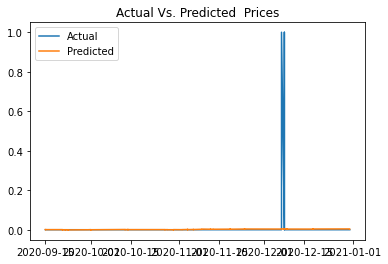

In [23]:
# Plot the real vs predicted prices as a line chart
stocks.plot(title="Actual Vs. Predicted  Prices")

In [25]:
training_start = final_df.index.min().strftime(format = "%Y-%m-%d")
training_end = "2020-09-01"
testing_start = "2020-09-02"
testing_end = final_df.index.max().strftime(format= '%Y-%m-%d')


In [26]:
output = final_df["target"]
inputs = final_df.drop(columns=["target"])

X1 = inputs[training_start:training_end]
y1 = output[testing_start:testing_end]

TypeError: '<' not supported between instances of 'datetime.date' and 'str'

In [ ]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train1 = X1[: split]
X_test1 = X1[split:]

y_train1 = y1[: split]
y_test1 = y1[split:]